In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-matrixfree-blur)

We use a readily available test image.

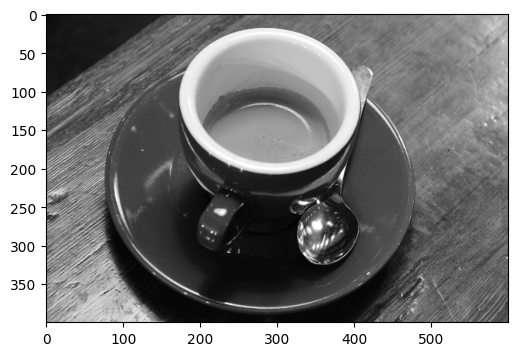

In [2]:
from skimage import data as testimages
from skimage.color import rgb2gray
img = getattr(testimages, "coffee")()
X = rgb2gray(img)
imshow(X, cmap="gray");

We define the one-dimensional tridiagonal blurring matrices.

In [3]:
import scipy.sparse as sp
def blurmatrix(d):
    data = [[0.25] * (d-1), [0.5] * d, [0.25] * (d-1)]
    return sp.diags(data, [-1, 0, 1], shape=(d, d))

m, n = X.shape
B = blurmatrix(m)
C = blurmatrix(n)

Finally, we show the results of using $k=12$ repetitions of the blur in each direction.

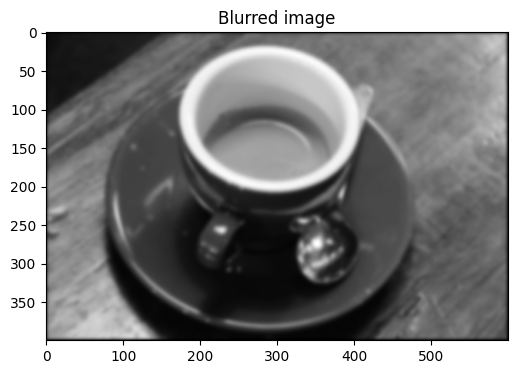

In [4]:
from scipy.sparse.linalg import matrix_power
blur = lambda X: matrix_power(B, 12) @ X @ matrix_power(C, 12)

imshow(blur(X), cmap="gray")
title("Blurred image");